In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Apply the default theme
sns.set_theme()

# Load the dataset
data_files = [f"../data/{year}.csv" for year in range(2017, 2022)]
data_frames = [pd.read_csv(file, na_values='?') for file in data_files]
data = pd.concat(data_frames, ignore_index=True)
data.fillna(data.median(), inplace=True) # Fill missing values with the mean



In [2]:
# Prepare features and scaling
features = data.columns.drop(['class'])

# Preprocessing
scaler = MinMaxScaler() # Normalize the data to be between 0 and 1
data[features] = scaler.fit_transform(data[features])

In [3]:
# Determine input and output
input_index = [55, 58]
output_index = [63, 22]

input_index = input_index - np.array([1])
output_index = output_index - np.array([1])

In [17]:
# Select input and output columns from the dataframe
inputs = data.iloc[:, input_index]  # Adjusting for zero-based index
outputs = data.iloc[:, output_index]  # Adjusting for zero-based index

# Convert inputs and outputs to numpy arrays
x = inputs.drop(data.index[100:])
y = outputs.drop(data.index[100:])

# Optionally, name the units if you have a specific column for that
names = [f"bank {i+1}" for i in range(len(x))]


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/a0830a1866ec4129818307aac54a5a67-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/a0830a1866ec4129818307aac54a5a67-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 106 COLUMNS
At line 511 RHS
At line 613 BOUNDS
At line 614 ENDATA
Problem MODEL has 101 rows, 4 columns and 402 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 100 (-1) rows, 2 (-2) columns and 200 (-202) elements
0  Obj -0 Dual inf 0.0094768547 (2)
2  Obj 0.98575233
Optimal - objective value 0.98575233
After Postsolve, objective 0.98575233, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 0.9857523343 - 2 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclo

<Axes: xlabel='Efficiency', ylabel='Count'>

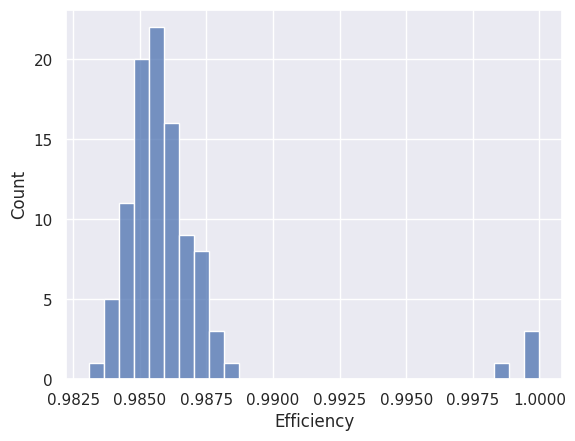

In [19]:
from pydea import DEAProblem

my_problem = DEAProblem(x, y, returns='CRS')
efficiency_scores = my_problem.solve()
sns.histplot(efficiency_scores['Efficiency'])